In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

Attribute Information:

scale (0:Not Applicable;1-5)

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service 

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Label:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
data=pd.read_csv("Invistico_Airline.csv")

# Outliers:

In [3]:
def outliersCapping(c):
    upper_limit = data[c].mean() + 3 * data[c].std()
    lower_limit = data[c].mean() - 3 * data[c].std()

    data[c] = np.where(
        data[c] > upper_limit,
        upper_limit,
        np.where(data[c] < lower_limit, lower_limit, data[c]),
    )

In [4]:
def box(data):
    eda_df=data.drop(['satisfaction', 'Gender', 'Customer Type','Type of Travel','Class'],axis=1)
    nonbinary_columns = [column for column in eda_df.columns if len(eda_df[column].unique()) > 2]

    plt.figure(figsize=(20, 20))

    for i, column in enumerate(nonbinary_columns):
        plt.subplot(3, 6, i + 1)
        sns.boxplot(data=eda_df[column],)
        plt.title(column)

    plt.suptitle("Boxplots With Outliers", size=30)
    plt.show()

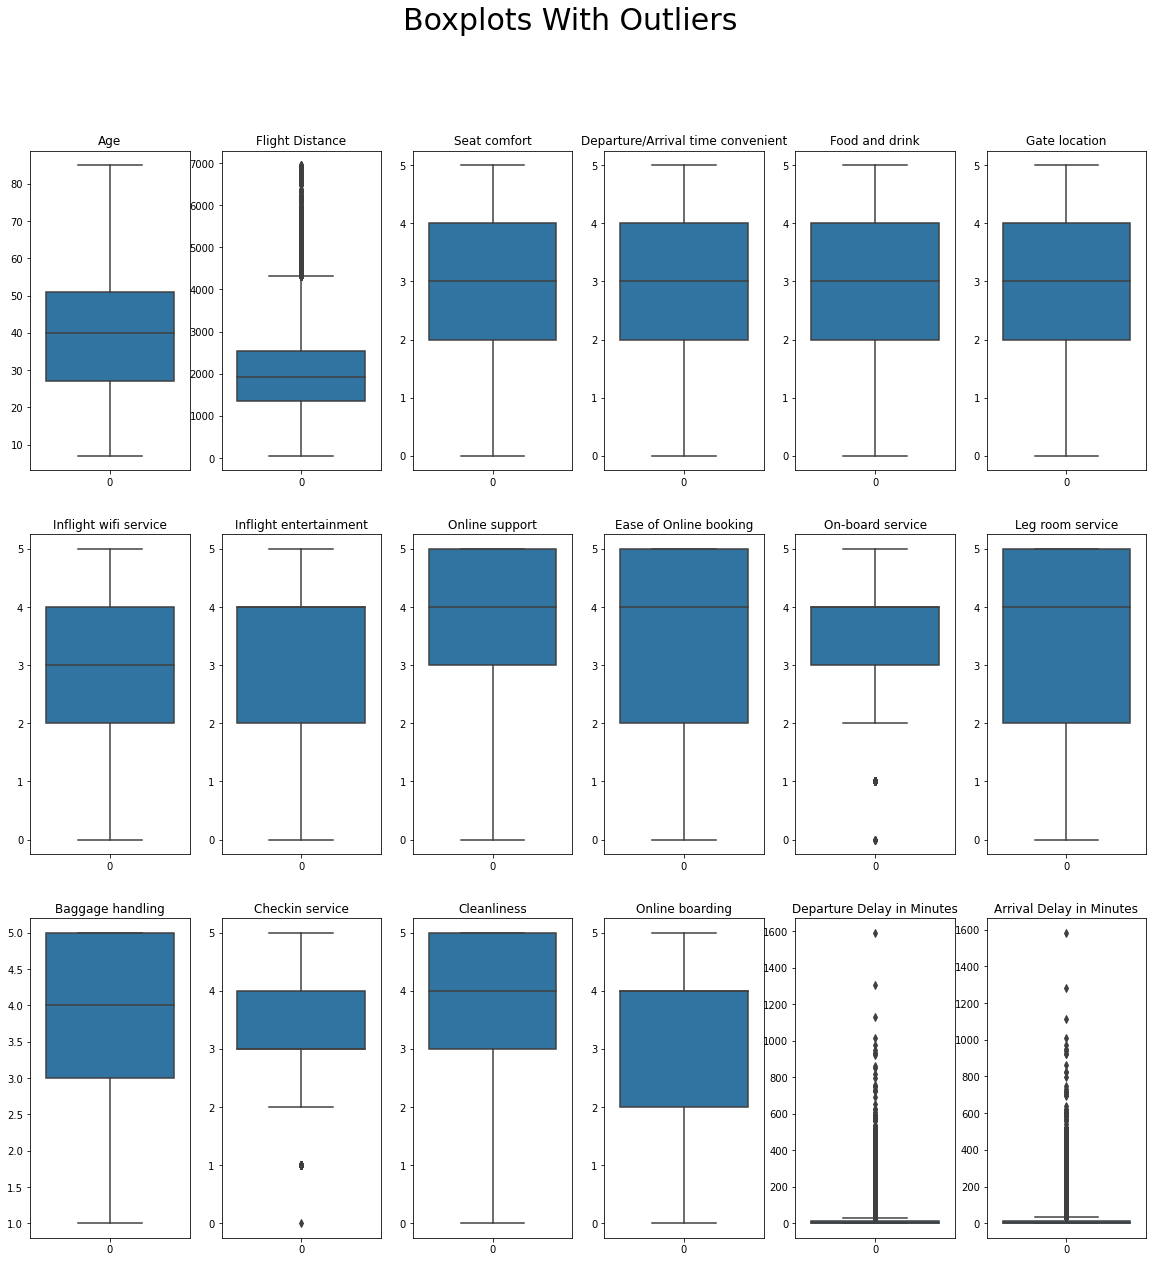

In [5]:
box(data)

In [6]:
outliersCapping('Departure Delay in Minutes')
outliersCapping('Arrival Delay in Minutes')
outliersCapping('Flight Distance')

# Encoding:

In [7]:
for col in data.columns:
   if data[col].dtype=='object':
       l_en=LabelEncoder()
       data[col] = l_en.fit_transform(data[col])

In [8]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265.0,0,0,0,...,2,3,3,0,3,5,3,2,0.000000,0.00000
1,1,1,0,47,1,0,2464.0,0,0,0,...,2,3,4,4,4,2,3,2,128.927091,130.48808
2,1,0,0,15,1,1,2138.0,0,0,0,...,2,2,3,3,4,4,4,2,0.000000,0.00000
3,1,0,0,60,1,1,623.0,0,0,0,...,3,1,1,0,1,4,1,3,0.000000,0.00000
4,1,0,0,70,1,1,354.0,0,0,0,...,4,2,2,0,2,4,2,5,0.000000,0.00000


# Feature selection

In [9]:
data=data.dropna()

In [10]:
x = data.drop(["satisfaction"], axis=1)
y = data["satisfaction"]

In [11]:
model = ExtraTreesClassifier()
model.fit(x, y)


ExtraTreesClassifier()

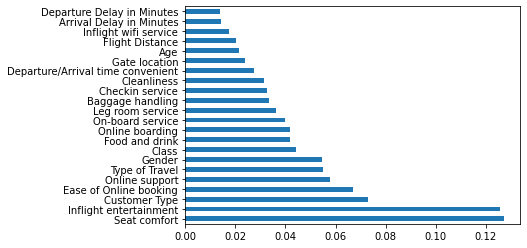

In [12]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(22).plot(kind="barh")
plt.show()

In [13]:
print(feat_importances.nlargest(22))

Seat comfort                         0.127232
Inflight entertainment               0.125529
Customer Type                        0.073103
Ease of Online booking               0.067007
Online support                       0.057774
Type of Travel                       0.054861
Gender                               0.054558
Class                                0.044401
Food and drink                       0.041868
Online boarding                      0.041639
On-board service                     0.039653
Leg room service                     0.036163
Baggage handling                     0.033448
Checkin service                      0.032812
Cleanliness                          0.031557
Departure/Arrival time convenient    0.027475
Gate location                        0.023696
Age                                  0.021539
Flight Distance                      0.020415
Inflight wifi service                0.017311
Arrival Delay in Minutes             0.014137
Departure Delay in Minutes        

In [14]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
unimportant = [
    "Cleanliness",
    "Departure/Arrival time convenient", "Gate location",
    "Age",
    "Flight Distance",
    "Inflight wifi service",
    "Arrival Delay in Minutes",
    "Departure Delay in Minutes",
]


# Modeling

In [16]:
d=data.drop(unimportant,axis=1)

In [17]:
x = data.drop(["satisfaction"], axis=1)
y = data["satisfaction"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Logistic Regression
0.8357161474673952
0.8344659819291065
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11821
           1       0.85      0.85      0.85     14077

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

Decision Tree
1.0
0.9396864622750791
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11821
           1       0.94      0.95      0.94     14077

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898

Random Forest Classifier
0.9999903464653583
0.9593404896130976
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy            

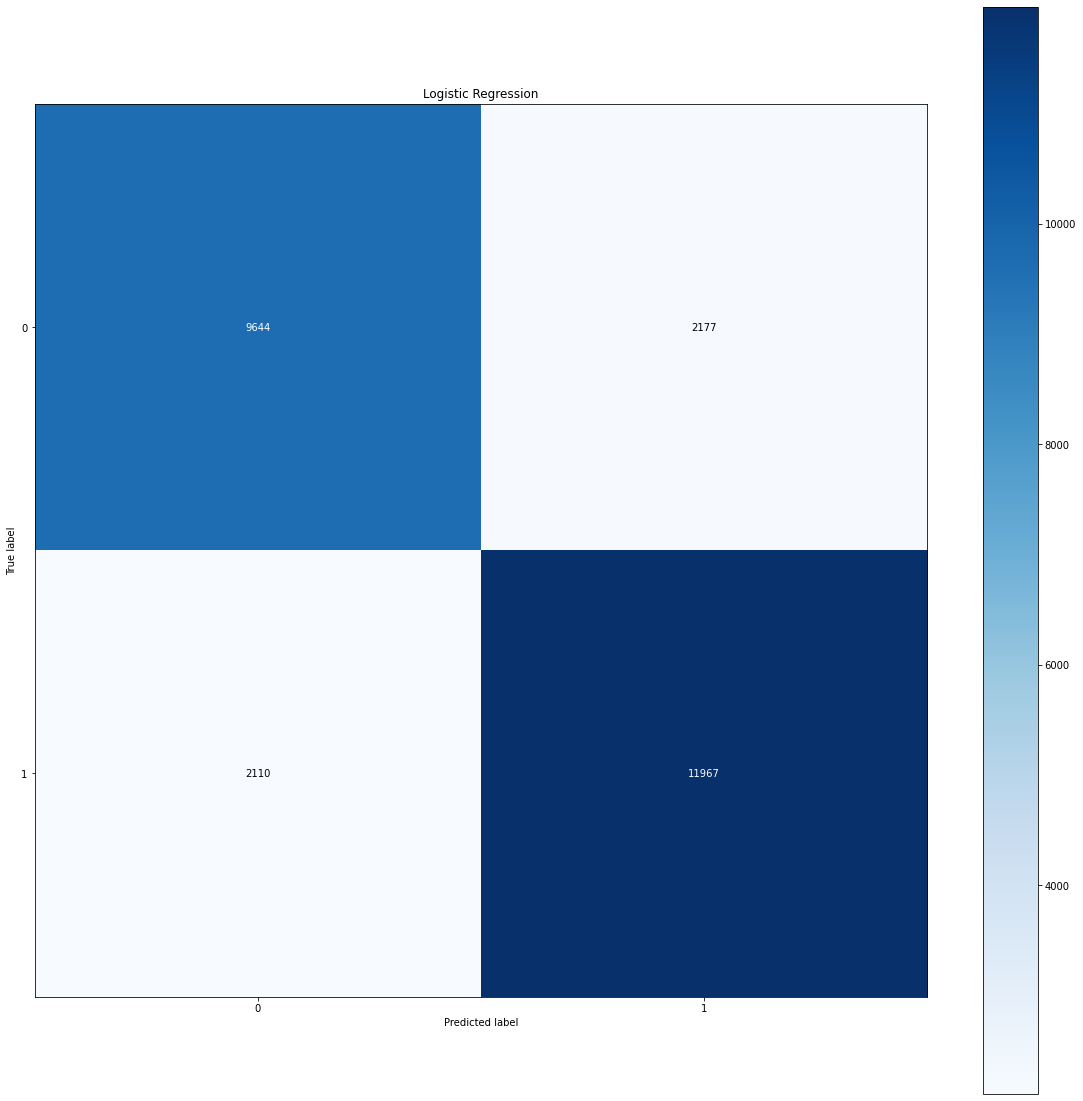

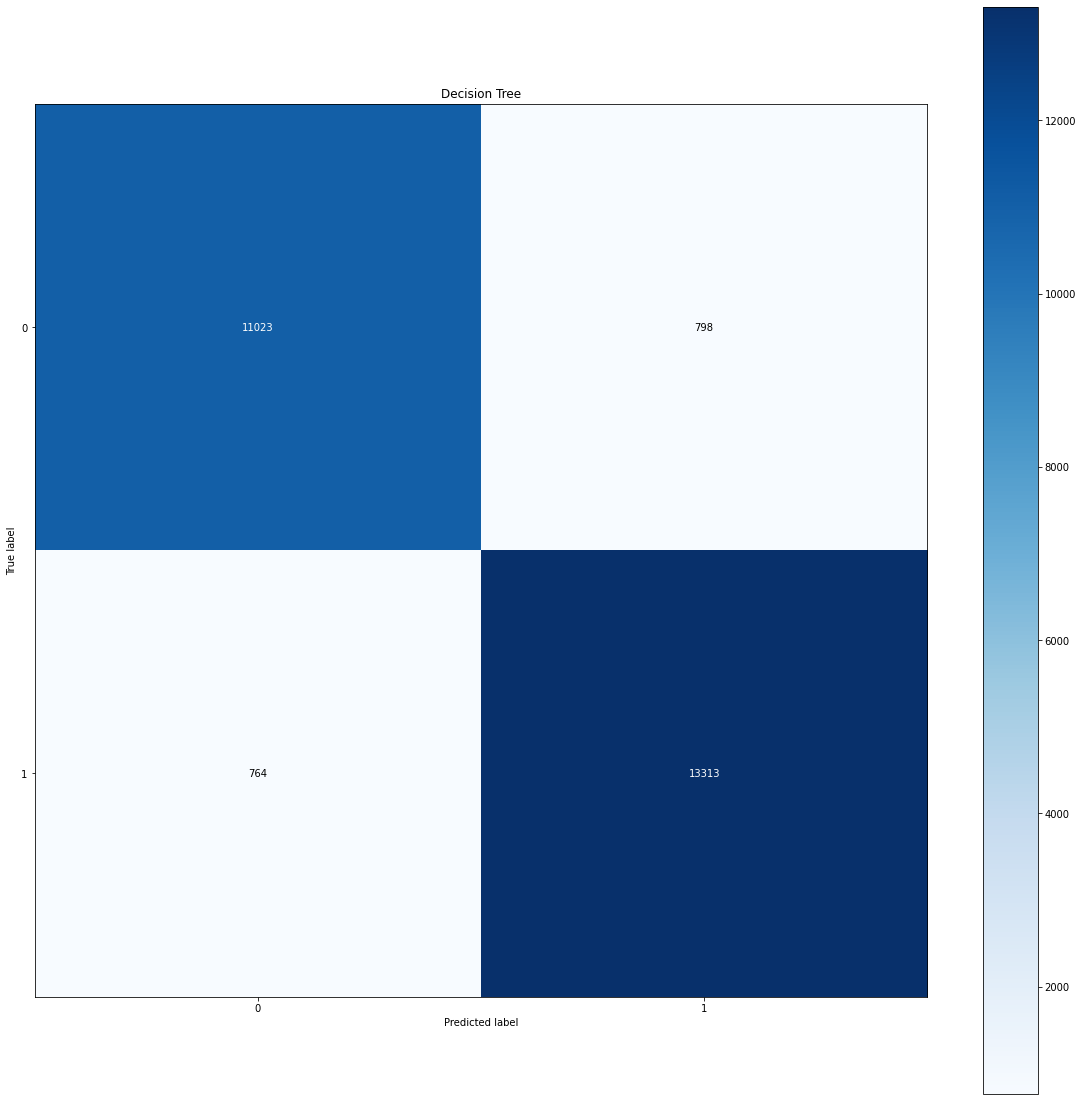

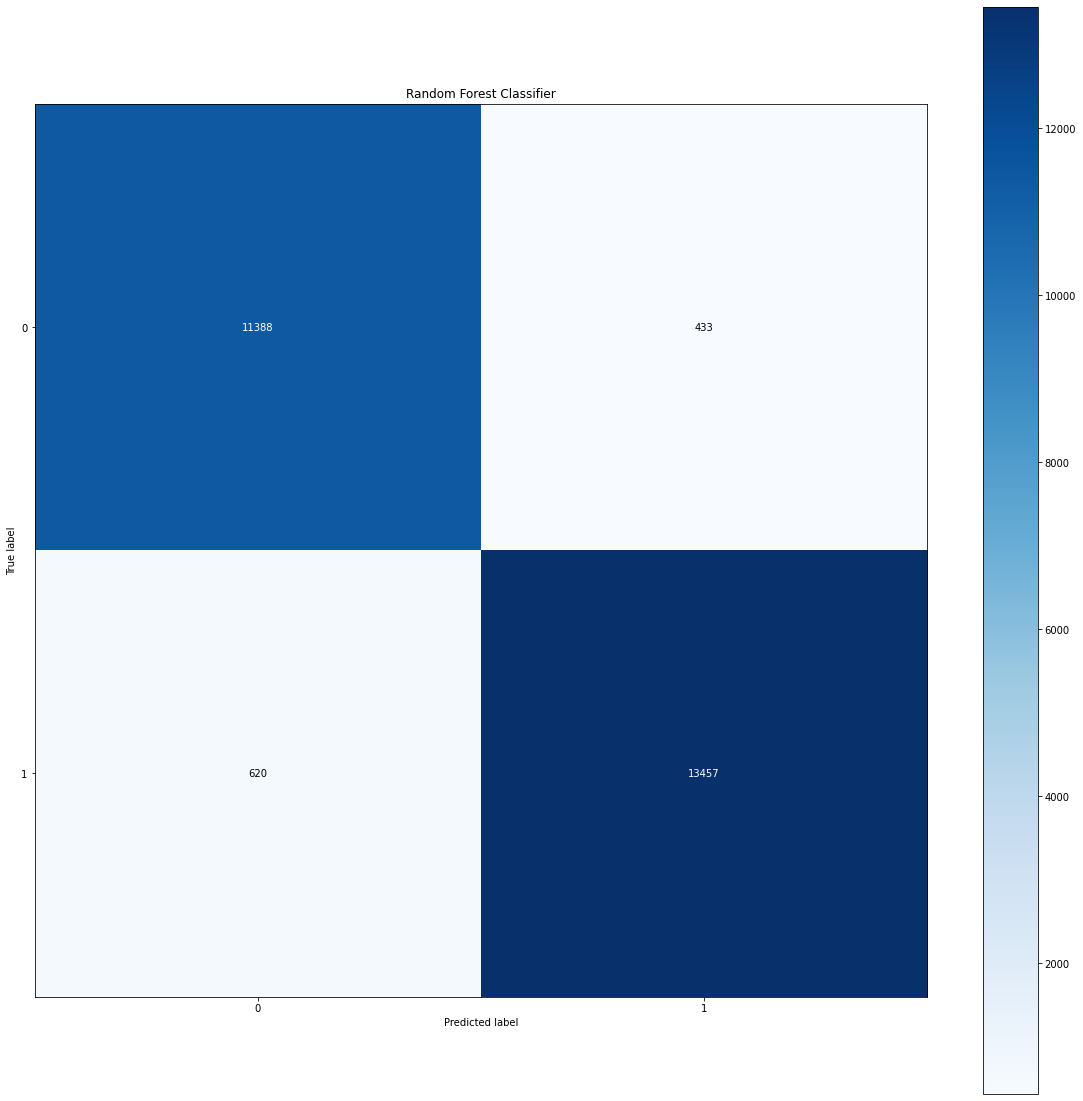

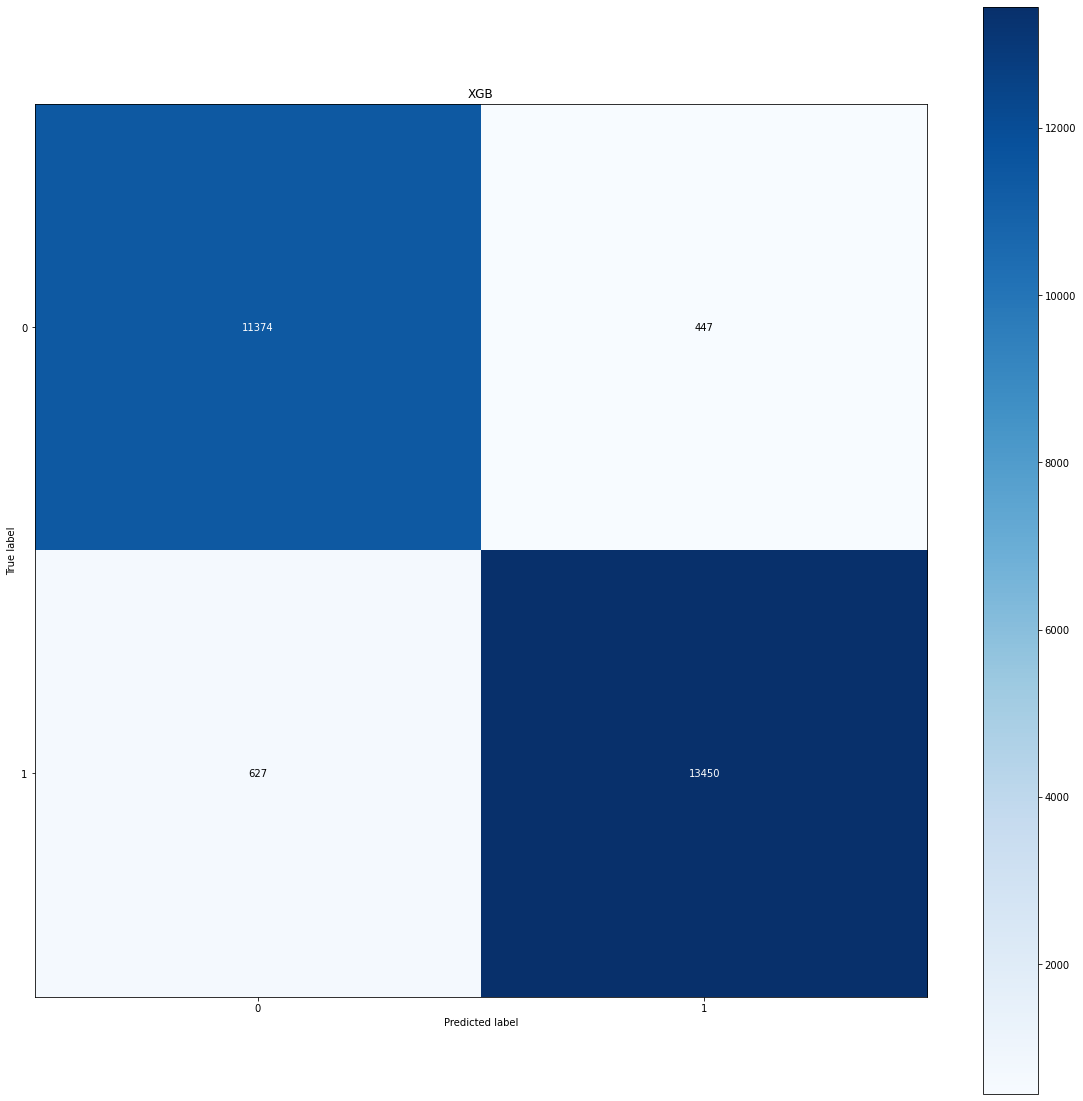

In [22]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(StandardScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


In [ ]:
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, x, y, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))